# Imports


In [1]:
from utils.experiment import *
from utils.transforms import *

# ✔️ Baseline

- Basic normalization
  - normalize values between 0 and 1 because images from the different datasets have different value ranges in the images
  - equalizeHist to have a unified brightness and contrast
  - normalize mean because it normalizes statistical properties of the images and is a recommended and often used step
  - same for standardization
- warum diese reihenfolge?


In [2]:
normalization = [
    Resize((32, 64)),
    Standardize(),
    NormalizeMinMax(),
    EqualizeHist(),
    Resize((64, 128)),
]

baseline = Experiment("Baseline", normalization + [ToTensor()])

# ✔️ No Preprocessing

In [3]:
no_preprocessing = Experiment("No Preprocessing", [Resize((64, 128)), ToTensor()])

# ✔️ CLAHE

In [4]:
clahe = Experiment(
    "CLAHE",
    [
        Resize((32, 64)),
        Standardize(),
        NormalizeMinMax(),
        CLAHE(),
        Resize((64, 128)),
        ToTensor(),
    ],
)

# ✔️ Agressive Thresholding
- One could also try out different thresholding algorithms, but there was no difference in my case, but maybe in combination with other preprocessing steps it might make a difference. skimage provides a function for plotting the results of the provided thresholding algorithms

In [5]:
agressive_thresholding = Experiment(
    "Agressive Thresholding",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(median_larger_zero),
        ToTensor(),
    ],
)


# ✔️ Agressive Thresholding + Sobel


In [6]:
sobel = Experiment(
    "Agressive Thresholding + Sobel",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(median_larger_zero),
        Sobel(),
        Threshold(median_larger_zero),
        ToTensor(),
    ],
)


# ✔️ Rolling Ball + Agressive Thresholding


In [7]:
rolling_ball = Experiment("Rolling Ball + Agressive Thresholding",
    [
        *normalization,
        RollingBall(radius=5),
        Blur((3, 3)),
        Threshold(median_larger_zero),
        ToTensor(),
    ]
)


# ✔️ Simple denoise
- comparison to agressive thresholding and rolling ball + thresholding which noise removal methods has the best result
- try different denoise functions?

In [8]:
simple_denoise = Experiment("Simple Denoise",
    [
        *normalization,
        Denoise(),
        Threshold(median_larger_zero),
        ToTensor(),
    ]
)

# ✔️ Fourier


In [9]:
fourier = Experiment("Fourier",
    [
        *normalization,
        Denoise(),
        Blur((3, 3)),
        HighPass(rad=50),
        Blur((3, 3)),
        Threshold(median_larger_zero),
        ToTensor(),
    ]
)


# ✔️ Improving SLP

- hier zwei szenarien testen: einmal diese transformation auf beide datensätze anwenden und einmal nur auf slp und agressive thresholding oder so auf physionet
- interessante sache: später resizen behält in den schritten davor noch mehr details, womit besser preprocessed werden kann
- Potential: Menschen auf slp bildern vergrößern, damit die auf allen druckbildern ungefähr gleich groß sind


In [10]:
improve_slp = Experiment("Improve SLP",
    [
        Standardize(),
        NormalizeMinMax(),
        EqualizeHist(),
        Blur((3, 3)),
        Denoise(),
        Threshold(median_larger_zero),
        Close((3, 3), ktype=cv2.MORPH_CROSS, iterations=3),
        Blur((3, 3)),
        Resize((64, 128)),
        ToTensor(),
    ]
)


# ✔️ Radial Transform
- als preprocessing schritt mit center origin
- als data augmentation schritt mit random origin

In [11]:
radial_transform = Experiment("Radial Transform",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(median_larger_zero),
        WarpPolar(),
        ToTensor(),
    ]
)


# ✔️ Radial Transform on Sobel

In [12]:
radial_transform_sobel = Experiment("Radial Transform on Sobel",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(median_larger_zero),
        Sobel(),
        Threshold(median_larger_zero),
        WarpPolar(),
        ToTensor(),
    ]
)


# ✔️ Dynamic Closing
-> Future Work: Look at each segment of the image instead of the whole image at once and do local dynamic closing

In [13]:
dynamic_closing = Experiment("Dynamic Closing",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(median_larger_zero),
        CloseInHoughDirection(),
        ToTensor(),
    ]
)

# ✔️ Individual Transform

In [14]:
individual_tranform = Experiment(
    "Individual Transform",
    transform=[ # Agressive Thresholding
        *normalization,
        Blur((3, 3)),
        Threshold(median_larger_zero),
        ToTensor(),
    ],
    transform_slp=[ # Improve SLP
        Standardize(),
        NormalizeMinMax(),
        EqualizeHist(),
        Blur((3, 3)),
        Denoise(),
        Threshold(median_larger_zero),
        Close((3, 3), ktype=cv2.MORPH_CROSS, iterations=3),
        Blur((3, 3)),
        Resize((64, 128)),
        ToTensor(),
    ],
)

# ✔️ Random Rotate

In [15]:
random_rotate = Experiment(
    "Random Rotate",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(median_larger_zero),
        RandomRotate(30),
        ToTensor(),
    ],
)

# ✔️ Random Rotate + Zoom

In [16]:
random_rotate_zoom = Experiment(
    "Random Rotate Zoom",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(median_larger_zero),
        RandomRotate(30),
        RandomZoom((128, 64)),
        ToTensor(),
    ],
)

# ✔️ Multichannel

In [2]:
multichannel = Experiment(
    "Multichannel",
    [
        Resize((64, 128)),
        Combine(
            [
                [
                    Standardize(),
                    NormalizeMinMax(),
                    EqualizeHist(),
                    Blur((3, 3)),
                    Threshold(median_larger_zero),
                ],
                [
                    Standardize(),
                    NormalizeMinMax(),
                    EqualizeHist(),
                    Blur((3, 3)),
                    Threshold(median_larger_zero),
                    WarpPolar(),
                ],
            ]
        ),
        ToTensor(),
    ],
)

# ✔️ Multichannel with Baseline

In [3]:
multichannel_baseline = Experiment(
    "Multichannel with Baseline",
    [
        Resize((64, 128)),
        Combine(
            [
                [
                    Standardize(),
                    NormalizeMinMax(),
                    EqualizeHist(),
                ],
                [
                    Standardize(),
                    NormalizeMinMax(),
                    EqualizeHist(),
                    Blur((3, 3)),
                    Threshold(median_larger_zero),
                    WarpPolar(),
                ],
            ]
        ),
        ToTensor(),
    ],
)

# ✔️ Multichannel with Original

In [4]:
multichannel_original = Experiment(
    "Multichannel with Original",
    [
        Resize((64, 128)),
        Combine(
            [
                [],
                [
                    Standardize(),
                    NormalizeMinMax(),
                    EqualizeHist(),
                    Blur((3, 3)),
                    Threshold(median_larger_zero),
                    WarpPolar(),
                ],
            ]
        ),
        ToTensor(),
    ],
)

# Evaluation

Running Experiment >>Multichannel<<
Reading data took 1.2s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.0976
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0799
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0710
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↗ 1.0736
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↗ 1.0968
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↘ 1.0916
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↗ 1.1164
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↘ 1.0739
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↘ 1.0047
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↗ 1.0298
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↘ 1.0119
Train progress: [                       

1. Training took 31m 0.2s
1. Evaluation took 14.9s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.0995
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0741
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0615
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↗ 1.0701
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↘ 1.0116
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↗ 1.0249
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↗ 1.0658
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↗ 1.0732
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↘ 1.0287
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↗ 1.0497
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↗ 1.0527
Train progress: [                       

2. Training took 29m 38.3s
2. Evaluation took 14.7s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.0968
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0671
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↗ 1.0856
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↗ 1.0924
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↘ 1.0636
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↘ 1.0041
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↗ 1.0410
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↗ 1.1065
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↘ 1.0831
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↘ 1.0627
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↘ 1.0260
Train progress: [                       

3. Training took 29m 34.1s
3. Evaluation took 14.4s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.1014
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0835
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0803
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↘ 1.0653
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↘ 1.0620
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↗ 1.1170
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↘ 1.0145
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↗ 1.0434
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↗ 1.0621
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↗ 1.1435
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↘ 1.0450
Train progress: [                       

4. Training took 31m 47.3s
4. Evaluation took 18.1s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.0998
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0852
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0848
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↘ 1.0686
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↗ 1.0793
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↘ 0.9887
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↗ 1.0726
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↘ 0.9712
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↗ 1.0543
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↘ 1.0222
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↘ 0.9867
Train progress: [                       

5. Training took 32m 9.7s
5. Evaluation took 16.1s
Successfully ran Experiment >>Multichannel<<
Running Experiment >>Multichannel with Baseline<<
Reading data took 1.8s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.1005
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0801
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0596
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↘ 1.0557
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↗ 1.1225
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↘ 1.0705
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↘ 1.0187
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↗ 1.0892
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↘ 1.0652
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↘ 1.0183
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↗ 1.0886
Train progress: [                       

1. Training took 30m 37.0s
1. Evaluation took 13.8s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.0973
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0804
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↗ 1.0896
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↘ 1.0312
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↗ 1.0937
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↘ 1.0377
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↗ 1.0683
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↘ 1.0257
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↘ 0.9650
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↗ 1.0550
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↘ 0.9559
Train progress: [                       

2. Training took 34m 55.2s
2. Evaluation took 19.6s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.0955
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0808
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0668
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↘ 1.0475
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↗ 1.1521
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↘ 1.0043
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↗ 1.0657
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↘ 1.0208
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↘ 0.8951
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↗ 1.0640
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↘ 0.9921
Train progress: [                       

3. Training took 34m 42.8s
3. Evaluation took 16.3s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.1014
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.1002
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0337
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↗ 1.0839
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↗ 1.1103
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↘ 1.0733
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↘ 1.0254
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↗ 1.1210
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↘ 1.0336
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↘ 1.0076
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↘ 1.0065
Train progress: [                       

4. Training took 31m 23.4s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------


4. Evaluation took 13.4s


Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.0983
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↗ 1.1088
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0855
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↘ 1.0609
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↘ 1.0373
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↗ 1.0593
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↘ 1.0239
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↘ 1.0035
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↗ 1.0752
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↘ 1.0488
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↘ 1.0336
Train progress: [                         ] 110/7370 Epoch: 1/10 Loss: ↗ 1.0383
Train progress: [                       

5. Training took 27m 40.1s
5. Evaluation took 13.3s
Successfully ran Experiment >>Multichannel with Baseline<<
Running Experiment >>Multichannel with Original<<
Reading data took 1.2s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.6569
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0294
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0114
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↗ 1.0185
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↘ 0.8092
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↗ 1.0842
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↘ 0.7091
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↘ 0.6002
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↗ 1.7615
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↘ 0.6611
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↘ 0.5686
Train progress: [                       

1. Training took 27m 24.0s
1. Evaluation took 12.3s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.4939
Train progress: [                             ] 10/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [                            ] 100/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [                            ] 190/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [-                           ] 280/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [-                           ] 380/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [-                           ] 470/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [--                          ] 560/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [--                          ] 660/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [--                          ] 737/7370 Epoch: 2/10 Loss: ↗ nan
Train progress: [--                          ] 747/7370 Epoch: 2/10 Loss: ↗ nan
Train progress: [---                    

2. Training took 25m 14.7s
2. Evaluation took 12.5s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 0.9276
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↗ 0.9860
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 0.8675
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↘ 0.5802
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↗ 0.6811
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↘ 0.5156
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↘ 0.4335
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↗ 0.7095
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↘ 0.4263
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↗ 0.4753
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↘ 0.3894
Train progress: [                       

3. Training took 32m 26.2s
3. Evaluation took 12.7s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.5153
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 0.9924
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↗ 1.0142
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↘ 0.9511
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↘ 0.8289
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↗ 0.8578
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↘ 0.5604
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↗ 2.9695
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↘ 0.6975
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↘ 0.6917
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↗ 0.7132
Train progress: [                       

4. Training took 30m 25.1s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------


4. Evaluation took 12.8s


Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.3769
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 0.9639
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 0.8226
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↘ 0.5408
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↗ 0.6462
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↗ 0.9210
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↘ 0.6765
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↘ 0.5751
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↗ 0.8618
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↘ 0.4304
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↗ 0.8259
Train progress: [                         ] 110/7370 Epoch: 1/10 Loss: ↘ 0.3197
Train progress: [                       

5. Training took 32m 2.0s
5. Evaluation took 12.7s
Successfully ran Experiment >>Multichannel with Original<<


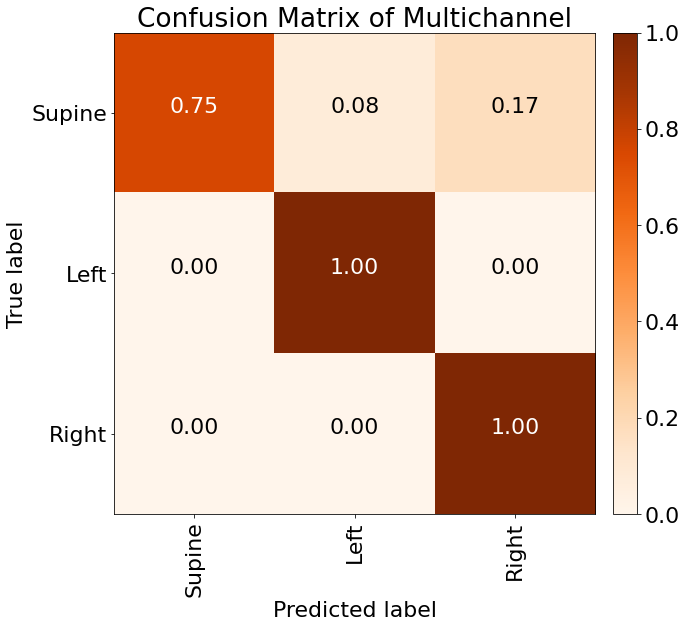

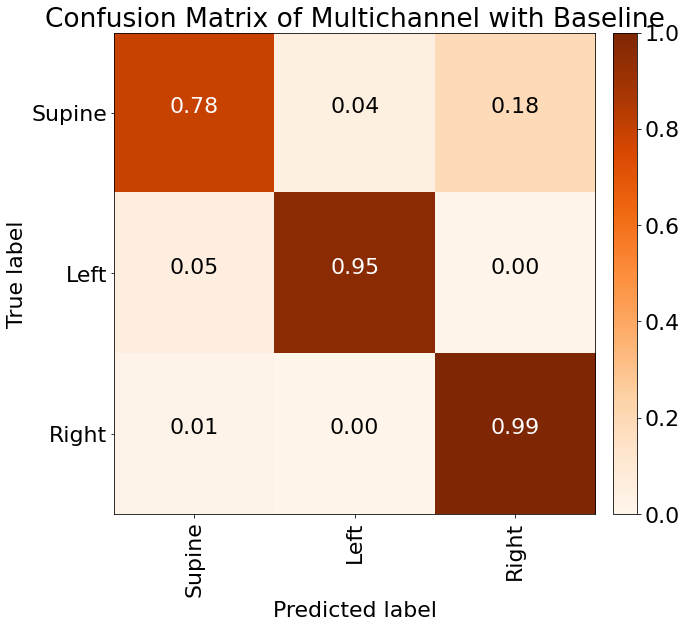

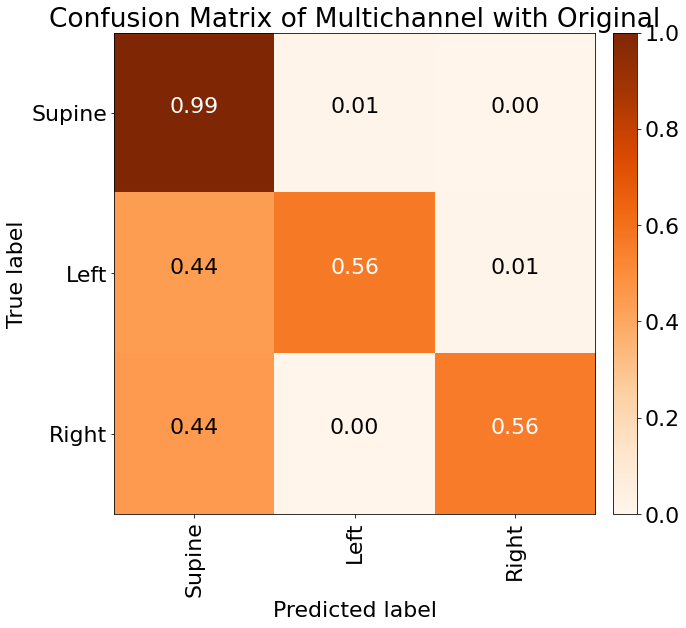

In [5]:
experiments = [multichannel, multichannel_baseline, multichannel_original]

for experiment in experiments:
    experiment.run()